# Make Your Own Database

The COSIMA cookbook uses a database to access information about experiments and to help with loading model output. We maintain a default database for ACCESS-OM2 experiments, but there are occasions when you might want to make your own database. This tutorial outlines the process of making your own private database.

**Requirements:** The `conda/analysis3-19.04` (or later) module on the VDI (or your own up-to-date cookbook installation).

In [1]:
%matplotlib inline
import cosima_cookbook as cc

**First, create a database session** using the inbuilt `create_session` function. To do this, you need to specify a path for the database - choose a location where you have write permission (that is, not the example that I have given here):

In [2]:
db = '/home/157/amh157/cc_test.db'
session = cc.database.create_session(db)

Note that you need to create the database session every time you start up your notebook; you can then update this database however many times you like.

**Now you are ready to build a database.** First, select which *experiments* you want to include in your database. For these purposes, an *experiment* is a directory containing output from a single simulation. (If you use a higher level directory you won't be able to distinguish between experiments.) 

My example below constructs a list of three experiment directories; I have chosen three cases with differing resolution. The database will be built to index all netcdf files in each directory.

In [3]:
dir_list=['/g/data3/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1',
          '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf_gmredi6',
          '/g/data3/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf']
cc.database.build_index(dir_list,session,update=True)

Indexing experiment: 1deg_jra55v13_iaf_spinup1_B1


0it [00:00, ?it/s]


Indexing experiment: 025deg_jra55v13_iaf_gmredi6


0it [00:00, ?it/s]


Indexing experiment: 01deg_jra55v13_iaf


0it [00:00, ?it/s]


0

Note that this operation may take a little while first time through, but is relatively painless to update -- **provided that you have the `update=True` flag switched on**. Now you have your own database - remember to specify your own database when you load model output, or else it will look for your experiment in the default database.

## Using the database
To know how to effectively use this database, please see the companion tutorial: `COSIMA_CookBook_Tutorial`. Alternatively, here is a sample that shows how you might load a variable from an experiment in your database.

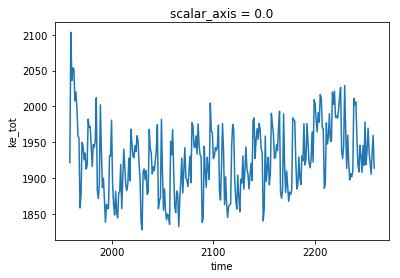

In [4]:
expt =  '025deg_jra55v13_iaf_gmredi6'
variable = 'ke_tot'
darray = cc.querying.getvar(expt, variable, session)
annual_average = darray.resample(time='A').mean(dim='time')
annual_average.plot()

If you want to know more about the inbuilt functions used above, you can use the help function at any time, for example:

In [5]:
help(cc.database.create_session)

Help on function create_session in module cosima_cookbook.database:

create_session(db=None, debug=False)
    Create a session for the specified database file.
    
    If debug=True, the session will output raw SQL whenever it is executed on the database.



In [6]:
help(cc.querying.getvar)

Help on function getvar in module cosima_cookbook.querying:

getvar(expt, variable, session, ncfile=None, n=None, start_time=None, end_time=None, chunks=None, time_units=None, offset=None, decode_times=True, check_present=False)
    For a given experiment, return an xarray DataArray containing the
    specified variable.
    
    expt - text string indicating the name of the experiment
    variable - text string indicating the name of the variable to load
    session - a database session created by cc.database.create_session()
    
    ncfile - If disambiguation based on filename is required, pass the ncfile
    argument.
    n - A subset of output data can be obtained by restricting the number of 
        netcdf files to load (use a negative value of n to get the last n 
        files, or a positive n to get the first n files).
    start_time - Only load data after this date. Specify the date as a text string
        (e.g. '1900-1-1')
    start_time - Only load data before this date. 